# Getting started with the Analytics Engine (AE)
This notebook covers:
1. selecting data to work with
2. retrieving a dataset from the catalog
3. a simple plot to preview the data
4. how to export that data

To execute a given 'cell' of this notebook, place the cursor in the cell and press the 'play' icon, or simply press shift+enter together. Some cells will take longer to run, and you will see a [$\ast$] to the left of the cell while AE is still working.

## Step 0: Setup
This cell imports the python library [climakitae](https://github.com/cal-adapt/climakitae), our AE toolkit for climate data analysis, and any other specialized libraries needed for a given notebook.

In [1]:
import panel as pn
pn.extension()

import climakitae as ck

## Step 1: Select data
Now we can call 'select' to display an interface from which to select the data to examine. Execute the cell, and read on for more explanation.

Currently, you can select from [dynamically-downscaled](https://dept.atmos.ucla.edu/alexhall/downscaling-cmip6) data produced at hourly intervals. If you select 'daily' or 'monthly' for 'Timescale', you will receive an average of the hourly data. The spatial resolution options, on the other hand, are each the output of a different simulation, nesting to higher resolution over smaller areas.

Future projections are available for a [greenhouse gas emission scenario (Shared Socioeconomic Pathway, or SSP)](https://climatescenarios.org/primer/socioeconomic-development) through 2100 for SSP 3-7.0 for 4 General Circulation Models (GCMs).

At 45 and 9km, more GCMs are to come, and one GCM was also downscaled for a higher and lower SSP. (Later, statistical downscaling will also be available at 3km for more GCMs.)

“Historical Climate” includes data from 1980-2014 simulated from the same GCMs used to produce the SSPs. It will be automatically appended to a SSP time series when both are selected. Because this historical data is obtained through simulations, it represents average weather during the historical period and is not meant to capture historical timeseries as they occurred. 

“Historical Reconstruction” provides a reference downscaled [reanalysis](https://www.ecmwf.int/en/about/media-centre/focus/2020/fact-sheet-reanalysis) dataset based on atmospheric models fit to satellite and station observations, and as a result will reflect observed historical time-evolution of the weather.

To learn more about the data available on the Analytics Engine, [see our data catalog](https://analytics.cal-adapt.org/data/). 

Card(collapsible=False, title='Choose Data A...)
    [0] Column
        [0] Row
            [0] Column(width=150)
                [0] StaticText(name='Data type')
                [1] RadioBoxGroup(inline=True, options=OrderedDict([('Gridded', ...]), value='Gridded')
            [1] Column(width=270)
                [0] StaticText(name='Downscaling method')
                [1] CheckBoxGroup(inline=True, name='Downscaling method', options=OrderedDict([('Dynamical',...]), value=['Dynamical'])
            [2] Column(width=400)
                [0] StaticText(style={'color': 'red'})
        [1] Spacer(background='black', height=1)
        [2] Row
            [0] Column(width=380)
                [0] StaticText(name='Variable')
                [1] Select(options=OrderedDict([('Air Tempera...]), value='Air Temperature at 2m')
                [2] StaticText(value="Temperature o...)
                [3] Row
                    [0] Column(width=250)
                        [0] StaticText(name='Historical Data', value='<br>Estimates o...)
                        [1] CheckBoxGroup(name='Scenario historical', options=OrderedDict([('Historical ...]), value=['Historical Climate'])
                        [2] StaticText(name='Future Model Data', value='<br> Shared S...)
                        [3] CheckBoxGroup(name='Scenario ssp', options=OrderedDict([('SSP 3-7.0 -...]))
                        [4] Column(width=220)
                            [0] ParamMethod(method)
                            [1] RangeSlider(end=2100, start=1950, step=1, value=(1980, 2015), value_end=2015, value_start=1980)
                    [1] Column(width=150)
                        [0] StaticText(name='Variable Units')
                        [1] RadioBoxGroup(name='Units', options=OrderedDict([('K', ...]), value='K')
                        [2] StaticText(name='Timescale')
                        [3] RadioBoxGroup(options=OrderedDict([('daily', ...]), value='monthly')
                        [4] StaticText(name='Model Grid-Spacing')
                        [5] RadioBoxGroup(name='Resolution', options=OrderedDict([('3 km', ...]), value='9 km')
                        [6] StaticText(style={'color': 'red'})
            [1] HSpacer(width=10)
            [2] Row
                [0] Column(width=220)
                    [0] ParamMethod(method)
                    [1] Select(name='Subset the data by...', options=OrderedDict([('none', ...]), value='none')
                    [2] Select(name='Location selection', options=OrderedDict([('entire doma...]), value='entire domain')
                    [3] RangeSlider(end=67, name='Latitude', start=10, value=(32.5, 42), value_end=42, value_start=32.5)
                    [4] RangeSlider(end=-84.18701, name='Longitude', start=-156.82317, value=(-125.5, -114), value_end=-114, value_start=-125.5)
                    [5] StaticText(value='Compute an area a...)
                    [6] RadioBoxGroup(inline=True, name='Area average', options=OrderedDict([('Yes', ...]), value='No')
                [1] Column(width=270)
                    [0] Spacer(height=10)
                    [1] StaticText(name='Weather station')
                    [2] CheckBoxGroup(options=OrderedDict([("Set data ty...]), value=["Set data type t...])
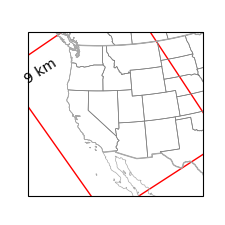
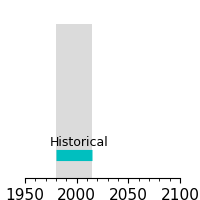

In [3]:
selections = ck.Select()
selections.show()

Nothing is required to enter these selections, besides moving on to Step 2.

However, if you want to preview what has been selected, you can type "app.selections" alone in a new cell. This stores your selections behind-the-scenes.

($+$ will create a new cell, following the currently selected) 

## Step 2: Retrieve data
Call app.retrieve(), to assign the subset/combo of data specified to a variable name of your choosing, in an xarray [DataArray](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html) format.

In [4]:
data_to_use = selections.data_parameters.retrieve()

You can preview the data in the retrieved, aggregated dataset when this is complete.

In [5]:
data_to_use

<xarray.DataArray 'Specific humidity at 2m' (scenario: 1, simulation: 4,
                                             time: 1440, y: 8, x: 6)>
dask.array<broadcast_to, shape=(1, 4, 1440, 8, 6), dtype=float32, chunksize=(1, 1, 615, 8, 6), chunktype=numpy.ndarray>
Coordinates:
  * x                  (x) float64 -4.17e+06 -4.161e+06 ... -4.125e+06
  * y                  (y) float64 1.331e+06 1.34e+06 ... 1.385e+06 1.394e+06
  * simulation         (simulation) <U26 'WRF_CESM2_r11i1p1f1' ... 'WRF_FGOAL...
  * time               (time) datetime64[ns] 1980-09-01 ... 2100-08-01
    lakemask           (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    landmask           (y, x) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    lat                (y, x) float32 37.35 37.4 37.45 ... 37.96 38.01 38.06
    lon                (y, x) float32 -121.9 -121.8 -121.8 ... -122.0 -122.0
    Lambert_Conformal  int64 0
  * scenario           (scenario) <U37 'Historical + SSP 5-8.5 -- Burn it All'
Attributes:
    variable_id:           q2
    extended_description:  The ratio of the mass of water vapor over the mass...
    units:                 g/kg
    data_type:             Gridded
    resolution:            9 km
    frequency:             monthly
    location_subset:       Alameda County
    institution:           UCLA
    grid_mapping:          Lambert_Conformal

Next, load the data into memory. This step may take a few minutes to compute, because the data is only loaded "lazily" until you output it (in visualize or export). This allows the previous steps to run faster.

In [6]:
data_to_use = ck.load(data_to_use)

Processing data to read 1.05 MB of data into memory... complete!


## Step 3: Visualize data
Preview the data before doing further calculations. 

In [7]:
ck.view(data_to_use)

:DynamicMap   [time,scenario,simulation]
   :Image   [x,y]   (Specific humidity at 2m)

The data previewer is also customizable: Check out an example where the display colors and coordinates are modified.

In [8]:
ck.view(data_to_use, lat_lon = False, cmap = "viridis")

:DynamicMap   [scenario,time,simulation]
   :Image   [x,y]   (Specific humidity at 2m)

More plotting helper-functions will be forthcoming.

See other notebooks for example analyses, or add your own.

In [ ]:
# [insert your own code here]

You can load up another variable or resolution by modifying your selections and calling: next_data = app.retrieve()

If you do this a lot, and things are starting to get slow, you might want to try: data_to_use.close()

## Step 4: Export data

To export, first pick a format from the dropdown menu.
- We recommend NetCDF, which will work with any number of variables and dimensions in your dataset
- CSV and GeoTIFF can only be used for data arrays with one variable
- CSV works best for up to 2-dimensional data (e.g., lon x lat), and will be compressed and exported with a separate metadata file
- GeoTIFF can accept 3 dimensions total: 
    - X and Y dimensions are required
    - The third dimension is flexible and will be a "band" in the file: time, simulation, or scenario could go here
    - Metadata will be accessible as "tags" in the .tif

In [9]:
export = ck.Export()

In [10]:
export.export_as()

Row
    [0] Select(name='Choose File F..., options=OrderedDict([('Pick a file...]), value='Pick a file format')

Next, write in the object you wish to export and your desired filename (in single or double quotation marks).

In [11]:
export.export_dataset(data_to_use, 'my_filename')

Alright, exporting specified data to NetCDF.
Saved! You can find your file(s) in the panel to the left and download to your local machine from there.
